In [45]:
# import all dependencies
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [46]:
# files
# https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv
# if updated data is needed, just download the new csv from the website or directly use the link
vaccination_csv = "../data/vaccinations.csv"

# https://gist.githubusercontent.com/tadast/8827699/raw/f5cac3d42d16b78348610fc4ec301e9234f82821/countries_codes_and_coordinates.csv
iso_csv = "../data/countries_codes_and_coordinates.csv"
result_csv = "../web/src/world_vaccination.csv"

# columns
iso_column = 'iso_code'
date_column = 'date'
total_vaccinations_column = 'total_vaccinations'
daily_vaccinations_raw_column = 'daily_vaccinations_raw'
daily_vaccinations_column = 'daily_vaccinations'
total_vaccinations_per_hundred_column = 'total_vaccinations_per_hundred'
people_fully_vaccinated_per_hundred_column = 'people_fully_vaccinated_per_hundred'
people_vaccinated_per_hundred_column = 'people_vaccinated_per_hundred'
daily_vaccinations_per_million_column = 'daily_vaccinations_per_million'
alpha_2 = 'Alpha-2 code'
alpha_3 = 'Alpha-3 code'

In [47]:
# read file in dataframe
vac_dat = pd.read_csv(vaccination_csv)
vac_dat.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0


In [48]:
# only keep latest data per country
vac_dat = vac_dat[vac_dat.groupby(iso_column)[date_column].transform('max') == vac_dat[date_column]]
vac_dat.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
135,Afghanistan,AFG,2021-07-07,934463.0,735213.0,199250.0,NaN,6801.0,2.40,1.89,0.51,175.0
316,Africa,OWID_AFR,2021-07-08,54692281.0,37858556.0,17528350.0,495404.0,454650.0,4.08,2.82,1.31,339.0
496,Albania,ALB,2021-07-08,1011297.0,582106.0,429191.0,5634.0,5259.0,35.14,20.23,14.91,1827.0
625,Algeria,DZA,2021-06-06,2500000.0,2500000.0,NaN,NaN,22664.0,5.70,5.70,NaN,517.0
780,Andorra,AND,2021-06-28,68329.0,41716.0,26613.0,NaN,723.0,88.43,53.99,34.44,9357.0


In [49]:
# change iso code 3 to 2
iso_dat = pd.read_csv(iso_csv)
for (i,iso_3) in vac_dat[iso_column].iteritems():
    for (j, iso_3_src) in iso_dat[alpha_3].iteritems():
        if (iso_3_src.strip(' "\'\t\r\n') == iso_3):
            iso_2 = iso_dat.at[j, alpha_2].strip(' "\'\t\r\n').lower()
            vac_dat.at[i, iso_column] = iso_2
            break
vac_dat.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
135,Afghanistan,af,2021-07-07,934463.0,735213.0,199250.0,NaN,6801.0,2.40,1.89,0.51,175.0
316,Africa,OWID_AFR,2021-07-08,54692281.0,37858556.0,17528350.0,495404.0,454650.0,4.08,2.82,1.31,339.0
496,Albania,al,2021-07-08,1011297.0,582106.0,429191.0,5634.0,5259.0,35.14,20.23,14.91,1827.0
625,Algeria,dz,2021-06-06,2500000.0,2500000.0,NaN,NaN,22664.0,5.70,5.70,NaN,517.0
780,Andorra,ad,2021-06-28,68329.0,41716.0,26613.0,NaN,723.0,88.43,53.99,34.44,9357.0


In [50]:
# just keep important data
vac_dat.drop([
    date_column,
    total_vaccinations_column,
    daily_vaccinations_raw_column,
    daily_vaccinations_column,
    total_vaccinations_per_hundred_column,
    people_fully_vaccinated_per_hundred_column,
    daily_vaccinations_per_million_column],
    axis=1, inplace=True)
vac_dat.head()

,location,iso_code,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred
135,Afghanistan,af,735213.0,199250.0,1.89
316,Africa,OWID_AFR,37858556.0,17528350.0,2.82
496,Albania,al,582106.0,429191.0,20.23
625,Algeria,dz,2500000.0,NaN,5.70
780,Andorra,ad,41716.0,26613.0,53.99


In [51]:
# set iso column as csv index
vac_dat.set_index(iso_column, inplace=True)
vac_dat.head()

,location,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred
iso_code,,,,
af,Afghanistan,735213.0,199250.0,1.89
OWID_AFR,Africa,37858556.0,17528350.0,2.82
al,Albania,582106.0,429191.0,20.23
dz,Algeria,2500000.0,NaN,5.70
ad,Andorra,41716.0,26613.0,53.99


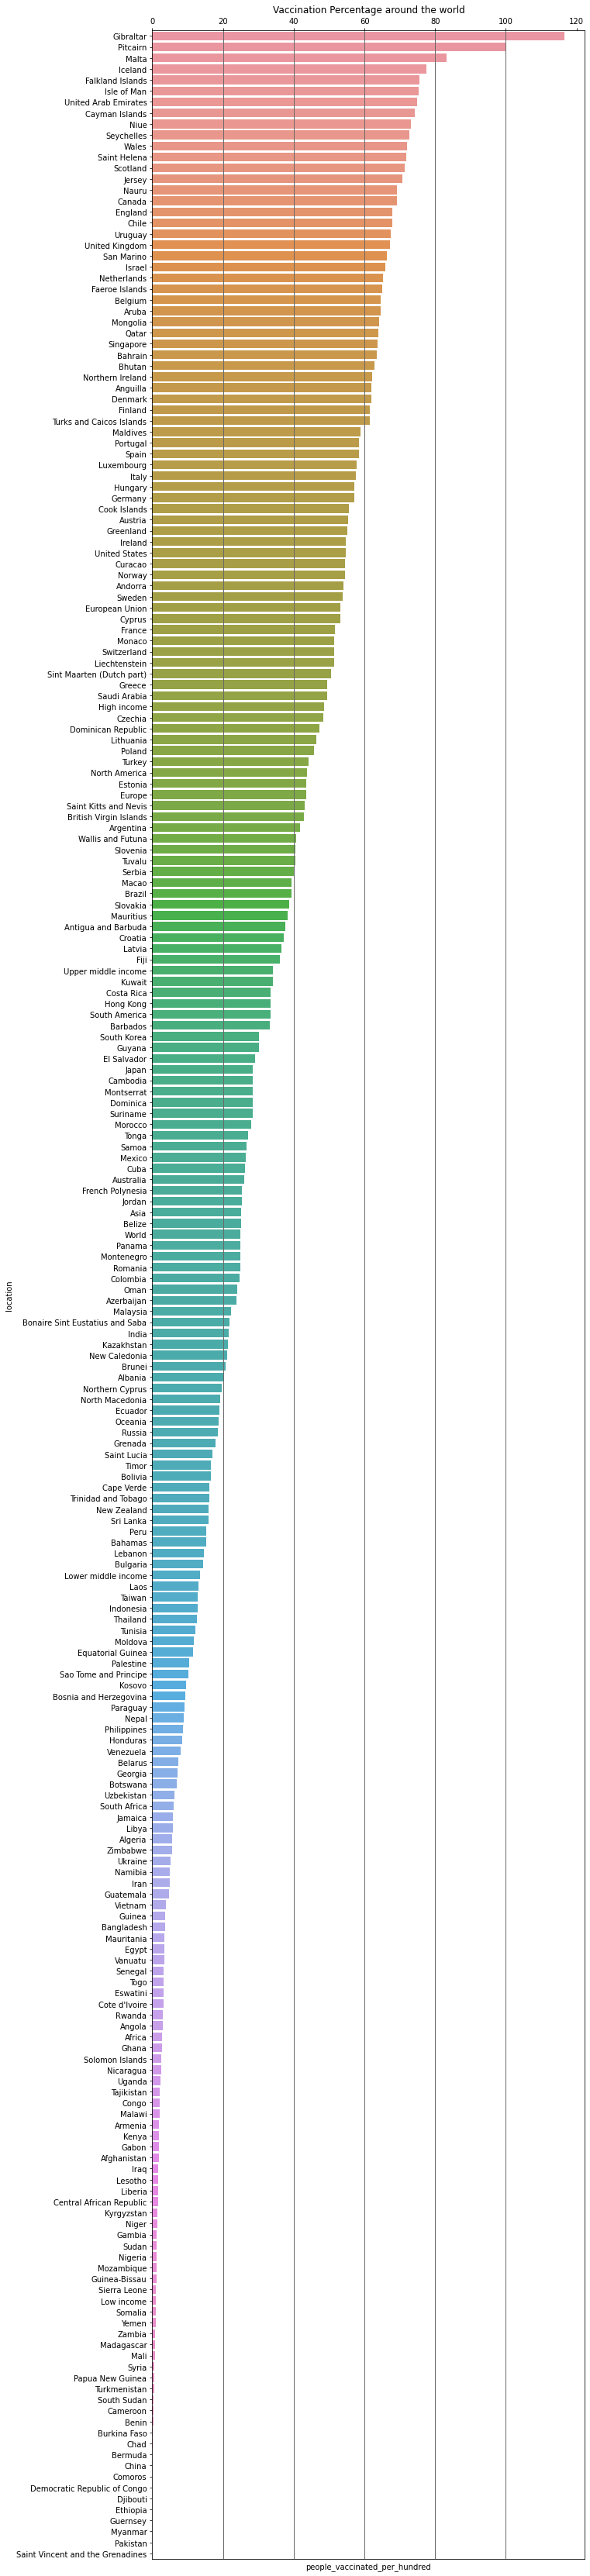

In [52]:
# look at data
plt.figure(figsize=(10,60))
plt.title("Vaccination Percentage around the world")
for x in [20,40,60,80,100]:
    plt.axvline(x, color='dimgray', lw=1)

# sort dataframe by vaccination percentage
plot_dat = vac_dat.sort_values(people_vaccinated_per_hundred_column, ascending=False)

# Bar chart
plot = sns.barplot(x=plot_dat[people_vaccinated_per_hundred_column], y=plot_dat['location'])
plot.xaxis.set_ticks_position("top")

In [53]:
# create csv file from dataframe
vac_dat.to_csv(result_csv)